# Assignment I
## 1. CEM Methods & Relevant Paper
We read the paper "An Efficient Method for Antenna Design
Optimization Based on Evolutionary Computation
and Machine Learning Techniques" by Bo Liu, Hadi Aliakbarian, Zhongkun Ma et al.[1].

This paper discusses using Evolutionary algorithms to construct antennae. Using accurate electromagnetic simulations for these can be computationally expensive. This, as the evolutionary algorithms by their nature require many simulation rounds. Using surrogate models allows this process to be sped up but will lose accuracy as the simulation will not be as accurate. However, if we can improve the surrogate modeling to be more accurate we could preserve the quality of results while reducing the required amount of computation.

The authors propose a new method of generating surrogate models. From the assumptions that the leading candidates will be similar, they can reduce the necessary amount of training data by focusing their evaluation on the leading antennae candidates.

With this improvement, the surrogate models were more accurate specifically for the leading candidates. The candidate antennas generated subsequently performed better. This resulted in the total computation required for achieving similar results as compared with traditional electromagnetic simulations while reducing the time required by a factor of 3-7.

## 2 Numerical errors
### 2.1 Machine epsilon
The definition of machine epsilon is the smallest number ε for which `1+ε > 1` is true for some computer and number datatype. According to the wikipedia page on Machine epsilon, there also exists an alternative definition, where it is an upper bound on rounding errors for a computer and number datatype.

In [ ]:
#Code heavily inspired by: https://stackoverflow.com/questions/19141432/python-numpy-machine-epsilon
#This link was provided in the assignment instructions

import numpy as np

def epsilonFloat(floatify=float):
    epsilon_candidate = floatify(1)
    while floatify(1)+floatify(epsilon_candidate) > floatify(1):
        prev_epsilon_candidate = epsilon_candidate
        epsilon_candidate = floatify(epsilon_candidate) / floatify(2)
    return prev_epsilon_candidate

print(epsilonFloat(np.float64)) # Numpy double point precision
print(np.finfo(np.float64).eps) # Numpy built-in epsilon, double precision
print(epsilonFloat(np.float32)) # Numpy single point precision
print(np.finfo(np.float32).eps) # Numpy built-in epsilon, single precision


2.220446049250313e-16
2.220446049250313e-16
1.1920929e-07
1.1920929e-07


### Does the machine epsilon depend on the precision?
Yes. As we can see, there is a difference between single and double point precision numbers. However, there is no difference between the numpy and default double point precision numbers. **fetstil**

### 2.2 Implement the calculation of a matrix-matrix multiplication A*B = C, where A, B, and C are NxN matrices using Python using 1) loops (naive implementation) 2) using np.matmul from NumPy

In [ ]:
# First Naive Implementation of the algorithm
import numpy as np
import matplotlib.pyplot as plt
import time as time

def RandomMatrix(Nrows, Ncols):
    return np.random.rand(Nrows, Ncols)

1) What is the mathematical complexity of calculating matrix-matrix multiply of two matrices of size NxN? O(1), or O(N), or O(N^2), or O(N^3) or O(N^4) or O(Nlog(n))?  Plot the execution time, varying N, and superimpose the expected complexity.

In [ ]:
def MatrixMultiplication_Naive(A, B, diagnostic = True):
    Nrows = len(A)
    Ncols = len(B[0])
    C = np.zeros((Nrows, Ncols))
    time1 = time.time()
    B_trans = list(zip(*B))

    for i in range(Nrows):
        for j in range(Ncols):
            temp_sum = 0
            for a_ik, b_kj in zip(A[i], B_trans[j]):
                temp_sum += a_ik * b_kj
            C[i][j] = temp_sum
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2 - time1}")
    return C, time2 - time1

In [ ]:
def MatrixMultiplication_NumPy(A, B, diagnostic = True):
    Nrows = A.shape[0]
    Ncols = B.shape[1]
    time1 = time.time()
    C = np.matmul(A,B)
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2-time1}")
    return C, time2-time1

In [ ]:
def Time_by_Size(func, N, diagnostic = True):
    "Time taken by the function by varying the size of the matrix"
    A = [RandomMatrix(Nval, Nval) for Nval in N]
    B = [RandomMatrix(Nval, Nval) for Nval in N]
    time_by_n = []
    for i in range(len(N)):
        _, time1 = func(A[i], B[i], diagnostic)
        time_by_n.append(time1)
    return np.array(time_by_n)

In [ ]:
N = [64, 128, 256, 512, 1024, 2048]
time_by_n_numpy = Time_by_Size(MatrixMultiplication_NumPy, N)
time_by_n_naive = Time_by_Size(MatrixMultiplication_Naive, N)

Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.0012769699096679688
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.002068042755126953
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.0006320476531982422
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.0033240318298339844
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.021280765533447266
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.18599700927734375
Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.033071279525756836
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.20355606079101562
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 1.2105348110198975
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 9.677772998809814
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 75.88517618179321
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 816.3999180793762


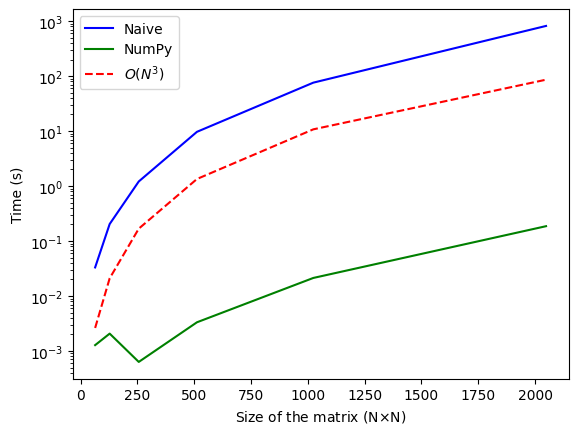

In [ ]:
fig, ax = plt.subplots()
ax.plot(N, time_by_n_naive, label = "Naive", color = "blue")
ax.plot(N, time_by_n_numpy, label = "NumPy", color = "green")
ax.plot(N, (np.array(N)**3)*1e-8, label = r"$O(N^3)$", color = "red", linestyle = "--")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Time (s)")
ax.legend()
plt.show()

### Answer 1)
1) The mathematical complexity of calculating the matrix-matrix multiplication A*B = C is O(N^3) for both the naive implementation and the NumPy-based implementation. This is because the matrix-matrix multiplication involves three nested loops, each iterating over the dimensions of the matrices (N x N) - for each entry of the result matrix N x N calculations must be done (N rows of A times N columns of B), and this is done for each entry of the result matrix which are again N values.

2) Calculate the error for matrix sizes N = 64, 128, 256, 512, 1024, 2048, and plot it (N on the x-axis and error on the y-axis). Use 2-norm (Euclidean norm) for evaluating the error.

In [ ]:
def RoundingError(func, Nrows, Ncols):
    A_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    B_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    C_double, _ = func(A_double, B_double)
    C_double = np.array(C_double)
    A_single = A_double.astype(np.float32)
    B_single = B_double.astype(np.float32)
    C_single, _ = func(A_single, B_single)
    C_single = np.array(C_single)
    return np.linalg.norm(C_double - C_single)


In [ ]:
def ComputeError(func, N):
    error = []
    for N_ in N:
        error.append(RoundingError(func, N_, N_))
    return error

error_numpy = ComputeError(MatrixMultiplication_NumPy, N = [64, 128, 256, 512, 1024, 2048])
error_naive = ComputeError(MatrixMultiplication_Naive, N = [64, 128, 256, 512, 1024, 2048])

Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.00018715858459472656
Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.00018310546875
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.003198862075805664
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.005337953567504883
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.0010497570037841797
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.0011620521545410156
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.011431217193603516
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.009889841079711914
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.03646492958068848
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.013803958892822266
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.34232497215270996
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.13258099555969238
Nr = 64, Nc = 64 	 Time taken for the m

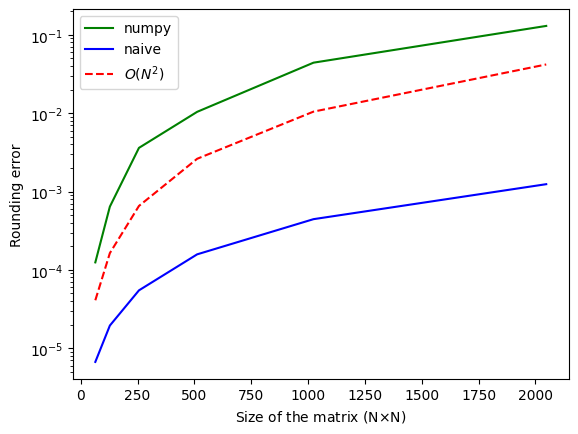

In [ ]:
# Plotting the results
N = [64, 128, 256, 512, 1024, 2048]
fig, ax = plt.subplots()
ax.plot(N, error_numpy, label = "numpy", color = "green")
ax.plot(N, error_naive, label = "naive", color = "blue")
ax.plot(N, (np.array(N)**2)*1e-8, label = r"$O(N^2)$", color = "red", linestyle = "--")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Rounding error")
ax.legend()
plt.show()

3) How does the rounding error grow by increasing N? Linearly, quadratically, cubically, exponentially, ...? Why is that? Hint: think about the complexity/number of operations needed.

### Answer 3)
3) The error grows quadratically with the size of the matrix. This is because for each term in the matrix-matrix multiplication, there are N multiplications and N-1 additions, leading to an accumulation of rounding errors of the order of N^2. While the matematical complexity of the matrix-matrix multiplication is O(N^3), the error growth is O(N^2) due to the accumulation of rounding errors in the N^2 calculations for each entry of the result matrix.

## References

[1] Bo Liu, H. Aliakbarian, Zhongkun Ma, G. A. E. Vandenbosch, G. Gielen, and P. Excell, “An Efficient Method for Antenna Design Optimization Based on Evolutionary Computation and Machine Learning Techniques,” IEEE transactions on antennas and propagation, vol. 62, no. 1, pp. 7–18, 2014, doi: 10.1109/TAP.2013.2283605.